In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import levy_stable
from scipy import stats

import math

In [2]:
data_yndx = pd.read_csv("YNDX.csv")
data_vkco = pd.read_csv("VKCO.IL.csv")
data_tcs_il = pd.read_csv("TCS.IL.csv")
data_poly_il = pd.read_csv("POLY.L.csv")


### Equation transforms a price series p into a log-returns r series for each asset:

In [3]:
def get_log_return(dataframe, column):
    log_return = []
    data = dataframe[column]
    for i in range(1, len(data)):
        log_return.append(np.log(data[i] / data[i - 1]))
    return log_return

In [4]:
log_return_yndx = pd.DataFrame({'log_return_yndx': get_log_return(data_yndx, 'Close')})
log_return_vkco = pd.DataFrame({'log_return_vkco': get_log_return(data_vkco, 'Close')})
log_return_tcs_il = pd.DataFrame({'log_return_tcs_il': get_log_return(data_tcs_il, 'Close')})
log_return_poly_il = pd.DataFrame({'log_return_poly_il': get_log_return(data_poly_il, 'Close')})

### Проверка на нормальное распределение критерием Шапиро-Уилка

In [5]:
res_yndx = stats.shapiro(pd.DataFrame({'log_return': log_return_yndx['log_return_yndx']}))
res_vkco = stats.shapiro(pd.DataFrame({'log_return': log_return_vkco['log_return_vkco']}))
res_tcs_il = stats.shapiro(pd.DataFrame({'log_return': log_return_tcs_il['log_return_tcs_il']}))
res_poly_il = stats.shapiro(pd.DataFrame({'log_return': log_return_poly_il['log_return_poly_il']}))

print('p-value:')
print('yndx:', res_yndx[1])
print('vkco:', res_vkco[1])
print('tcs_il:', res_tcs_il[1])
print('poly_il:', res_poly_il[1])

p-value:
yndx: 1.2273982941124473e-09
vkco: 6.867368007590358e-09
tcs_il: 4.4525447307560036e-15
poly_il: 4.1895285851634156e-11


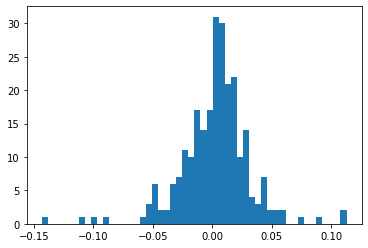

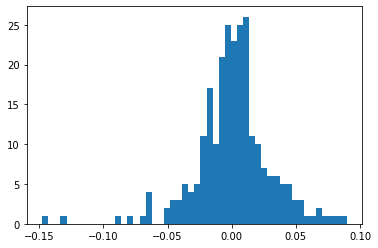

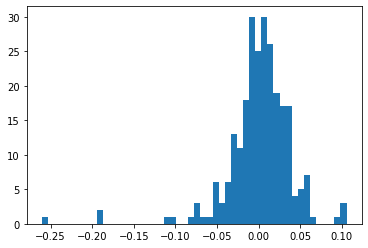

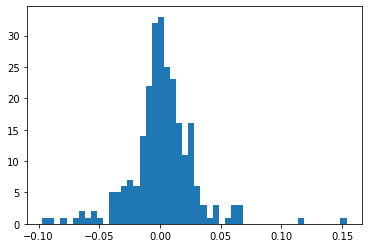

In [6]:
for item in [log_return_yndx, log_return_vkco, log_return_tcs_il, log_return_poly_il]:
    plt.figure()
    plt.hist(item, bins=50, label='hst')

In [7]:
def show_corr(dataframe):
    plt.figure(figsize=(22,18), dpi= 50)
    sns.heatmap(dataframe.corr(), xticklabels=dataframe.corr().columns, yticklabels=dataframe.corr().columns, cmap='RdYlGn', center=0, annot=True)

    # Decorations
    plt.title('Correlogram of mtcars', fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [8]:
all_data = pd.DataFrame()
all_data = pd.concat([log_return_yndx, log_return_vkco, log_return_tcs_il, log_return_poly_il], axis=1)
all_data


,log_return_yndx,log_return_vkco,log_return_tcs_il,log_return_poly_il
0,0.002638,-0.012110,-0.004162,-0.003712
1,0.002047,-0.035292,0.000000,-0.029352
2,-0.010573,0.011583,0.002083,-0.013279
3,0.000295,-0.006740,0.004154,0.025964
4,0.019872,-0.009709,0.015425,-0.010984
...,...,...,...,...
248,0.014487,-0.007648,0.018653,0.030041
249,0.059370,0.019012,0.044184,0.029452
250,0.030079,0.018657,0.038540,0.008584
251,0.011031,0.046940,0.035287,0.042393


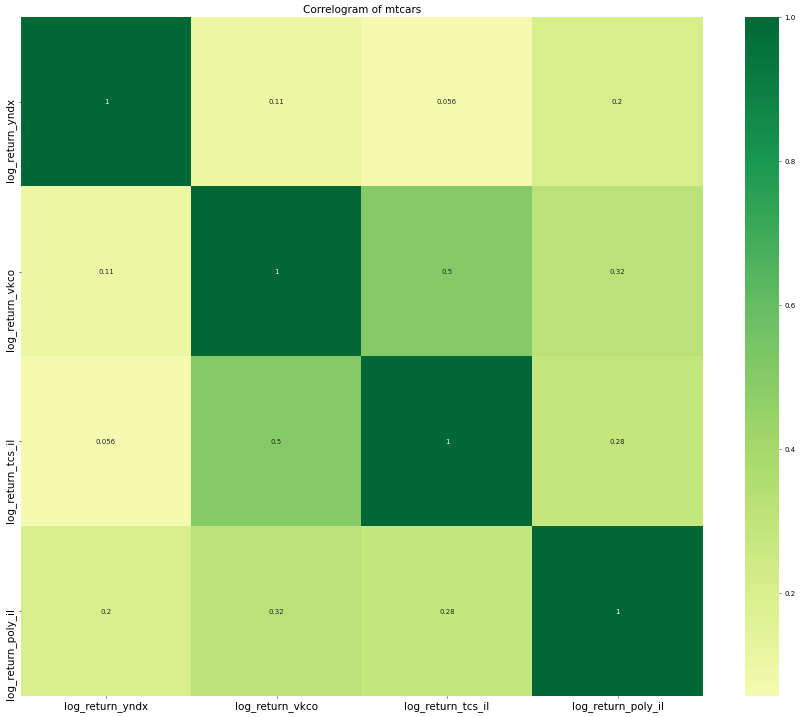

In [9]:
show_corr(all_data)

### Оценка параметров

##### Сдвигаем на -E[X]


In [10]:
def get_expected_value(dataframe):
    return dataframe.mean()

In [11]:
def math_expectation_shift(dataframe):
    return dataframe - get_expected_value(dataframe)

Expected value: log_return_yndx    0.00249
dtype: float64


array([[<AxesSubplot:title={'center':'log_return_yndx'}>]], dtype=object)

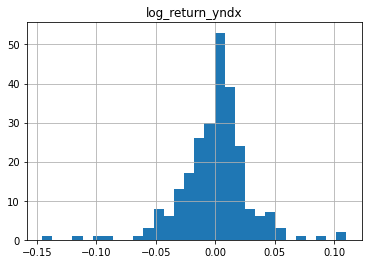

In [12]:
print('Expected value:', (get_expected_value(log_return_yndx)))
log_return_yndx = math_expectation_shift(log_return_yndx)
log_return_yndx.hist(bins=30)

### Построение характеристической функции

In [13]:
def characteristic_func(dataframe):
    plt.plot(dataframe.index, dataframe.sort_values(by=[dataframe.columns[0]]))
    plt.show()

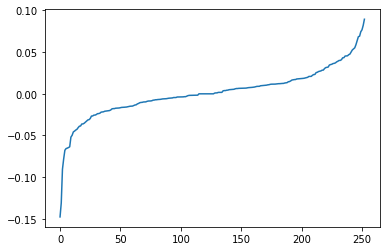

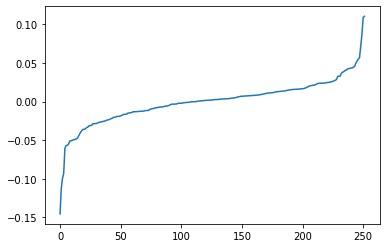

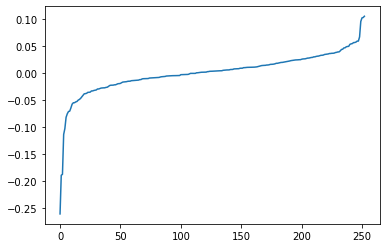

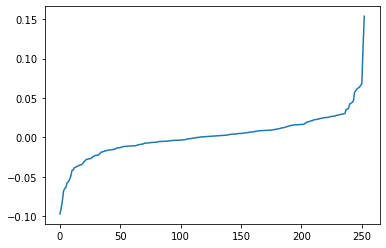

In [14]:
characteristic_func(log_return_vkco)
characteristic_func(log_return_yndx)
characteristic_func(log_return_tcs_il)
characteristic_func(log_return_poly_il)

### Нахождение параметров alpha и sigma

In [15]:
def func_log_log_yndx(dataframe):
    return np.log(-np.log((dataframe ** 2)))

In [16]:
func_opt_yndx = func_log_log_yndx(log_return_yndx)
func_opt_yndx

,log_return_yndx
0,2.869910
1,2.737223
2,2.160556
3,2.504982
4,2.092436
...,...
247,2.135423
248,2.179995
249,1.746347
250,1.971398
